In [1]:

import numpy as np

from mfpml.design_of_experiment.multifidelity_samplers import MFLatinHyperCube
from mfpml.models.co_kriging import CoKriging
from mfpml.models.hierarchical_kriging import HierarchicalKriging
from mfpml.models.mf_scale_kriging import ScaledKriging
from mfpml.optimization.mf_acqusitions import (augmentedEI, extendedPI, vfei,
                                               vflcb)
from mfpml.optimization.mfbo import mfBayesOpt
from mfpml.problems.multifidelity_functions import Forrester_1a, mf_Hartman3

In [2]:
# define problem
func = Forrester_1a()
print(func.optimum)

# define sampler
sampler = MFLatinHyperCube(design_space=func._design_space, seed=7)

# get initial samples
sample_x = sampler.get_samples(
    num_hf_samples=3 * func.num_dim, num_lf_samples=6 * func.num_dim
)
sample_y = func(sample_x)

-6.02074


iter: 0, eval HF: 3, eval LF: 6, found optimum: 0.78725, 
iter: 1, eval HF: 4, eval LF: 6, found optimum: -5.19324, 
iter: 2, eval HF: 5, eval LF: 6, found optimum: -5.60463, 
iter: 3, eval HF: 5, eval LF: 7, found optimum: -5.60463, 
iter: 4, eval HF: 5, eval LF: 8, found optimum: -5.60463, 
iter: 5, eval HF: 6, eval LF: 8, found optimum: -5.99903, 
iter: 6, eval HF: 7, eval LF: 8, found optimum: -5.99903, 
iter: 7, eval HF: 8, eval LF: 8, found optimum: -6.01301, 
iter: 8, eval HF: 9, eval LF: 8, found optimum: -6.01301, 
iter: 9, eval HF: 10, eval LF: 8, found optimum: -6.01301, 
iter: 10, eval HF: 11, eval LF: 8, found optimum: -6.01301, 


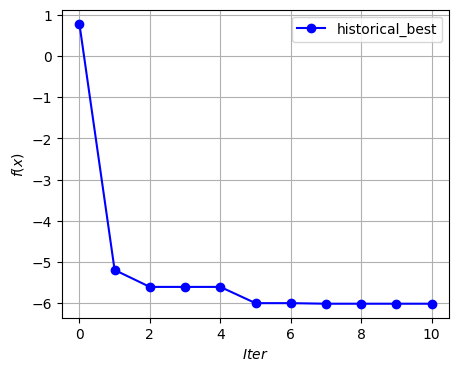

In [4]:
mf_model = ScaledKriging(design_space=func._input_domain, optimizer_restart=20)
acf1 = vfei()
acf2 = augmentedEI()
acf3 = vflcb()
acf4 = extendedPI()

opti = mfBayesOpt(problem=func)

opti.run_optimizer(
    mf_surrogate=mf_model,
    acquisition=acf2,
    max_iter=10,
    init_x=sample_x,
    init_y=sample_y,
)
opti.historical_plot(figsize=(5, 4))